In [2]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('buildingp').getOrCreate()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
db = spark.read.csv('Data/BuildingPermitTotals.csv', header=True, inferSchema=True)
db.show()


+-----------------------------------------------------------------------------------------+----+-------------------+--------------------+--------------------+--------------------+--------------------+---------------+----------------+-------------+--------------+-----------+------------+----------+-----------+----+----+----+
|New Privately Owned Housing Units Authorized by Building Permits in Permit-Issuing Places| _c1|                _c2|                 _c3|                 _c4|                 _c5|                 _c6|            _c7|             _c8|          _c9|          _c10|       _c11|        _c12|      _c13|       _c14|_c15|_c16|_c17|
+-----------------------------------------------------------------------------------------+----+-------------------+--------------------+--------------------+--------------------+--------------------+---------------+----------------+-------------+--------------+-----------+------------+----------+-----------+----+----+----+
|                     

In [79]:
db_pd = pd.read_csv('Data/BuildingPermitTotals.csv', skiprows=[0,1,2,3], skipfooter=14, engine='python')
print(db_pd)

         Universe  Year United States Total United States 1 Unit  \
0   1984 Universe  1986             1,769.4              1,077.6   
1             NaN  1987             1,534.8              1,024.4   
2             NaN  1988             1,455.6                993.8   
3             NaN  1989             1,338.4                931.7   
4             NaN  1990             1,110.8                793.9   
5             NaN  1991               948.8                753.5   
6             NaN  1992             1,094.9                910.7   
7             NaN  1993             1,199.1                986.5   
8   1994 Universe  1994             1,371.6              1,068.5   
9             NaN  1995             1,332.5                997.3   
10            NaN  1996             1,425.6              1,069.5   
11            NaN  1997             1,441.1              1,062.4   
12            NaN  1998             1,612.3              1,187.6   
13            NaN  1999             1,663.5     

In [81]:
drop = ["Unnamed: 15","Unnamed: 16","Unnamed: 17"]
db_pd.drop(drop, inplace=True, axis=1)

In [82]:
db_pd.to_csv('Data/Build.csv', index=False)

In [83]:
db1 = spark.read.csv('Data/Build.csv', header=True, inferSchema=True)
db1.show()

+-------------+----+-------------------+--------------------+---------------------+--------------------------+-----------------------------+---------------+----------------+-------------+--------------+-----------+------------+----------+-----------+
|     Universe|Year|United States Total|United States 1 Unit|United States 2 Units|United States 3 to 4 units|United States 5 Units or More|Northeast Total|Northeast 1 Unit|Midwest Total|Midwest 1 Unit|South Total|South 1 Unit|West Total|West 1 Unit|
+-------------+----+-------------------+--------------------+---------------------+--------------------------+-----------------------------+---------------+----------------+-------------+--------------+-----------+------------+----------+-----------+
|1984 Universe|1986|            1,769.4|             1,077.6|                 50.4|                      58.0|                        583.5|          283.3|           203.8|        290.0|         167.5|      686.5|       443.2|     509.7|      263

In [84]:
print((db1.count(), len(db1.columns)))

(35, 15)


In [85]:
db1.printSchema()

root
 |-- Universe: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- United States Total: string (nullable = true)
 |-- United States 1 Unit: string (nullable = true)
 |-- United States 2 Units: double (nullable = true)
 |-- United States 3 to 4 units: double (nullable = true)
 |-- United States 5 Units or More: double (nullable = true)
 |-- Northeast Total: double (nullable = true)
 |-- Northeast 1 Unit: double (nullable = true)
 |-- Midwest Total: double (nullable = true)
 |-- Midwest 1 Unit: double (nullable = true)
 |-- South Total: string (nullable = true)
 |-- South 1 Unit: double (nullable = true)
 |-- West Total: double (nullable = true)
 |-- West 1 Unit: double (nullable = true)



In [86]:
#field names
col_name =  pd.DataFrame(
    columns=['Field']
    )
                        
for row in list(db_pd.columns):
    col_name.loc[row] = row

#Prints data types
data_types = pd.DataFrame(db_pd.dtypes, columns=['Data Type'])



#Prints missing data
missing_data = pd.DataFrame(
    db_pd.isnull().sum(),
    columns=['Missing']
)

#unique values
unique_values = pd.DataFrame(
    columns=['Unique']
)
for row in list(db_pd.columns.values):
    unique_values.loc[row] = [db_pd[row].nunique()]




dq_report = col_name.join(data_types).join(missing_data).join(unique_values)
print(dq_report)

                                                       Field Data Type  \
Universe                                            Universe    object   
Year                                                    Year     int64   
United States Total                      United States Total    object   
United States 1 Unit                    United States 1 Unit    object   
United States 2 Units                  United States 2 Units   float64   
United States 3 to 4 units        United States 3 to 4 units   float64   
United States 5 Units or More  United States 5 Units or More   float64   
Northeast Total                              Northeast Total   float64   
Northeast 1 Unit                            Northeast 1 Unit   float64   
Midwest Total                                  Midwest Total   float64   
Midwest 1 Unit                                Midwest 1 Unit   float64   
South Total                                      South Total    object   
South 1 Unit                          

In [94]:
fclean = pd.read_csv('Data/Build.csv')

drop = ["Universe"]
fclean.drop(drop, inplace=True, axis=1)


fclean.to_csv("Data/firstclean.csv", index=False) 

In [98]:
bd2 = pd.read_csv("Data/firstclean.csv")
bd2.drop(bd2.index[0:4],0,inplace=True)
print(bd2)

bd2.to_csv("Data/finalclean.csv", index=False)

    Year United States Total United States 1 Unit  United States 2 Units  \
4   1990             1,110.8                793.9                   26.7   
5   1991               948.8                753.5                   22.0   
6   1992             1,094.9                910.7                   23.3   
7   1993             1,199.1                986.5                   26.7   
8   1994             1,371.6              1,068.5                   31.4   
9   1995             1,332.5                997.3                   32.2   
10  1996             1,425.6              1,069.5                   33.6   
11  1997             1,441.1              1,062.4                   34.9   
12  1998             1,612.3              1,187.6                   33.2   
13  1999             1,663.5              1,246.7                   32.5   
14  2000             1,592.3              1,198.1                   30.6   
15  2001             1,636.7              1,235.6                   31.8   
16  2002    

In [12]:
mg1 = pd.read_csv("Data/finalclean.csv")

mg2 = pd.read_csv("Data/FinalCleanData.csv")


finalm = pd.merge(mg1, mg2, left_on=['Year'],
              right_on=['Year'],
              how='inner')
print(finalm)

finalm.to_csv("Data/finalmerged.csv", index=False)

    Year United States Total United States 1 Unit  United States 2 Units  \
0   1990             1,110.8                793.9                   26.7   
1   1991               948.8                753.5                   22.0   
2   1992             1,094.9                910.7                   23.3   
3   1993             1,199.1                986.5                   26.7   
4   1994             1,371.6              1,068.5                   31.4   
5   1995             1,332.5                997.3                   32.2   
6   1996             1,425.6              1,069.5                   33.6   
7   1997             1,441.1              1,062.4                   34.9   
8   1998             1,612.3              1,187.6                   33.2   
9   1999             1,663.5              1,246.7                   32.5   
10  2000             1,592.3              1,198.1                   30.6   
11  2001             1,636.7              1,235.6                   31.8   
12  2002    

In [19]:
f1 = pd.read_csv("Data/finalmerged.csv")

f1.dtypes

Year                                                       int64
United States Total                                       object
United States 1 Unit                                      object
United States 2 Units                                    float64
United States 3 to 4 units                               float64
United States 5 Units or More                            float64
Northeast Total                                          float64
Northeast 1 Unit                                         float64
Midwest Total                                            float64
Midwest 1 Unit                                           float64
South Total                                               object
South 1 Unit                                             float64
West Total                                               float64
West 1 Unit                                              float64
HONEY - PRODUCTION, MEASURED IN LB                         int64
HONEY, BEE COLONIES - INV

In [20]:
print(f1)

    Year United States Total United States 1 Unit  United States 2 Units  \
0   1990             1,110.8                793.9                   26.7   
1   1991               948.8                753.5                   22.0   
2   1992             1,094.9                910.7                   23.3   
3   1993             1,199.1                986.5                   26.7   
4   1994             1,371.6              1,068.5                   31.4   
5   1995             1,332.5                997.3                   32.2   
6   1996             1,425.6              1,069.5                   33.6   
7   1997             1,441.1              1,062.4                   34.9   
8   1998             1,612.3              1,187.6                   33.2   
9   1999             1,663.5              1,246.7                   32.5   
10  2000             1,592.3              1,198.1                   30.6   
11  2001             1,636.7              1,235.6                   31.8   
12  2002    

In [23]:
f1 = f1.replace(',','', regex=True)

In [28]:
cols = ['United States Total', 'United States 1 Unit', 'South Total']
f1[cols] = f1[cols].apply(pd.to_numeric, axis=1)

f1.dtypes


Year                                                       int64
United States Total                                      float64
United States 1 Unit                                     float64
United States 2 Units                                    float64
United States 3 to 4 units                               float64
United States 5 Units or More                            float64
Northeast Total                                          float64
Northeast 1 Unit                                         float64
Midwest Total                                            float64
Midwest 1 Unit                                           float64
South Total                                              float64
South 1 Unit                                             float64
West Total                                               float64
West 1 Unit                                              float64
HONEY - PRODUCTION, MEASURED IN LB                         int64
HONEY, BEE COLONIES - INV

In [29]:
Q1 = f1.quantile(0.25)
Q3 = f1.quantile(0.75)
IQR = Q3 - Q1
((f1 < (Q1 - 1.5 * IQR)) | (f1 > (Q3 + 1.5 * IQR))).sum()

Year                                                     0
United States Total                                      0
United States 1 Unit                                     0
United States 2 Units                                    0
United States 3 to 4 units                               0
United States 5 Units or More                            0
Northeast Total                                          0
Northeast 1 Unit                                         0
Midwest Total                                            0
Midwest 1 Unit                                           0
South Total                                              0
South 1 Unit                                             0
West Total                                               0
West 1 Unit                                              0
HONEY - PRODUCTION, MEASURED IN LB                       0
HONEY, BEE COLONIES - INVENTORY, MEASURED IN COLONIES    2
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4aa3d28438>]],
      dtype=object)

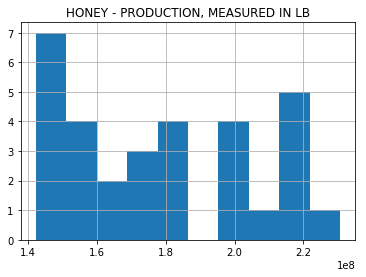

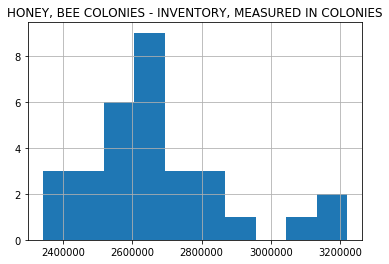

In [30]:
f1.hist(column='HONEY - PRODUCTION, MEASURED IN LB')
f1.hist(column='HONEY, BEE COLONIES - INVENTORY, MEASURED IN COLONIES')

0     8.298003
1     8.344441
2     8.345683
3     8.362980
4     8.338570
5     8.324622
6     8.300093
7     8.293223
8     8.343462
9     8.307641
10    8.342987
11    8.269632
12    8.234816
13    8.259412
14    8.263622
15    8.242079
16    8.190079
17    8.171261
18    8.214285
19    8.165589
20    8.246651
21    8.171308
22    8.153193
23    8.174786
24    8.251176
25    8.195083
26    8.210174
27    8.173259
28    8.187543
29    8.195684
30    8.169069
Name: HONEY - PRODUCTION, MEASURED IN LB, dtype: float64
0     6.507856
1     6.506640
2     6.483587
3     6.458638
4     6.444513
5     6.424065
6     6.411788
7     6.420121
8     6.421110
9     6.423574
10    6.418633
11    6.406540
12    6.410609
13    6.414806
14    6.407221
15    6.381837
16    6.379124
17    6.387923
18    6.369587
19    6.397592
20    6.430075
21    6.396374
22    6.404663
23    6.421768
24    6.437909
25    6.425045
26    6.444045
27    6.428783
28    6.451479
29    6.449015
30    6.432328
Name: HONEY, 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4aa3cd56a0>]],
      dtype=object)

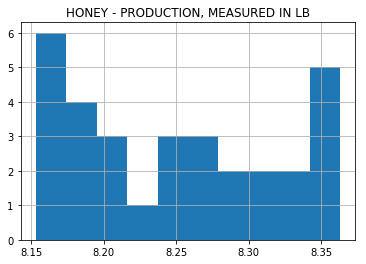

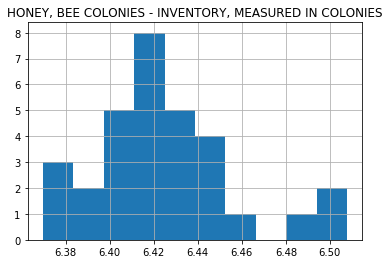

In [31]:
logf= f1.copy()
(logf['HONEY - PRODUCTION, MEASURED IN LB']) = np.log10(logf['HONEY - PRODUCTION, MEASURED IN LB'])
(logf['HONEY, BEE COLONIES - INVENTORY, MEASURED IN COLONIES']) = np.log10(logf['HONEY, BEE COLONIES - INVENTORY, MEASURED IN COLONIES'])
print(logf['HONEY - PRODUCTION, MEASURED IN LB'])
print(logf['HONEY, BEE COLONIES - INVENTORY, MEASURED IN COLONIES'])

logf.to_csv("Data/finalmergedlog10.csv", index=False)


logf.hist(column='HONEY - PRODUCTION, MEASURED IN LB')
logf.hist(column='HONEY, BEE COLONIES - INVENTORY, MEASURED IN COLONIES')

In [3]:
df=pd.read_csv("Data/finalmergedlog10.csv")

In [7]:
df.corr()

,Year,United States Total,United States 1 Unit,United States 2 Units,United States 3 to 4 units,United States 5 Units or More,Northeast Total,Northeast 1 Unit,Midwest Total,Midwest 1 Unit,South Total,South 1 Unit,West Total,West 1 Unit,"HONEY - PRODUCTION, MEASURED IN LB","HONEY, BEE COLONIES - INVENTORY, MEASURED IN COLONIES"
Year,1.000000,-0.178273,-0.351376,-0.480967,-0.520380,0.567690,-0.217841,-0.757306,-0.587749,-0.645085,0.047850,-0.077534,-0.203511,-0.360649,-0.860829,-0.328296
United States Total,-0.178273,1.000000,0.973543,0.922705,0.902747,0.555409,0.956128,0.752392,0.873697,0.837172,0.969615,0.977554,0.991844,0.969536,0.228181,-0.242044
United States 1 Unit,-0.351376,0.973543,1.000000,0.959433,0.955622,0.351037,0.927474,0.859858,0.932684,0.921956,0.907081,0.955167,0.965845,0.996780,0.362973,-0.207109
United States 2 Units,-0.480967,0.922705,0.959433,1.000000,0.969285,0.278150,0.872650,0.895714,0.952804,0.939914,0.824981,0.873399,0.923268,0.958407,0.452596,-0.129115
United States 3 to 4 units,-0.520380,0.902747,0.955622,0.969285,1.000000,0.210348,0.872003,0.913915,0.936395,0.939575,0.803653,0.862582,0.900302,0.956285,0.451713,-0.223560
United States 5 Units or More,0.567690,0.555409,0.351037,0.278150,0.210348,1.000000,0.542244,-0.054825,0.179392,0.069703,0.676877,0.536070,0.548768,0.345793,-0.396223,-0.238606
Northeast Total,-0.217841,0.956128,0.927474,0.872650,0.872003,0.542244,1.000000,0.749304,0.841117,0.808251,0.911329,0.918424,0.944077,0.924876,0.271246,-0.209906
Northeast 1 Unit,-0.757306,0.752392,0.859858,0.895714,0.913915,-0.054825,0.749304,1.000000,0.959971,0.980347,0.583379,0.675013,0.751491,0.857811,0.728096,0.008412
Midwest Total,-0.587749,0.873697,0.932684,0.952804,0.936395,0.179392,0.841117,0.959971,1.000000,0.991384,0.735738,0.794468,0.871232,0.928803,0.608268,-0.047998
Midwest 1 Unit,-0.645085,0.837172,0.921956,0.939914,0.939575,0.069703,0.808251,0.980347,0.991384,1.000000,0.690579,0.768557,0.832900,0.918820,0.640760,-0.056899
